In [1]:
import pandas as pd
import matplotlib.pyplot as plt


import sklearn.metrics as skm
import sklearn
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('C:/Users/mailv/OneDrive/Documents/Machine_learning/season-0910_csv.csv')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import random
random.seed(10)

#This is only for home team
# X = dataset[['HS', 'HST','HC','HF','HY','HR']]
y = dataset['FTR']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

datafiles=['C:/Users/mailv/OneDrive/Documents/Machine_learning/season-0910_csv.csv','C:/Users/mailv/OneDrive/Documents/Machine_learning/season-1011_csv.csv',
'C:/Users/mailv/OneDrive/Documents/Machine_learning/season-1112_csv.csv', 'C:/Users/mailv/OneDrive/Documents/Machine_learning/season-1213_csv.csv',
'C:/Users/mailv/OneDrive/Documents/Machine_learning/season-1314_csv.csv','C:/Users/mailv/OneDrive/Documents/Machine_learning/season-1415_csv.csv',
'C:/Users/mailv/OneDrive/Documents/Machine_learning/season-1516_csv.csv','C:/Users/mailv/OneDrive/Documents/Machine_learning/season-1617_csv.csv',
'C:/Users/mailv/OneDrive/Documents/Machine_learning/season-1718_csv.csv','C:/Users/mailv/OneDrive/Documents/Machine_learning/season-1819_csv.csv']
    

"""
Stashing stuff
print(pd.crosstab(y_test, y_pred_GNB, rownames=['True'], colnames=['Predicted'], margins=True))

print("Accuracy score for Logistic Regression is:", skm.accuracy_score(y_test, y_pred_GNB)*100,'%')

print(pd.crosstab(y_test, y_pred_LR, rownames=['True'], colnames=['Predicted'], margins=True))

print("Accuracy score for Logistic Regression is:", skm.accuracy_score(y_test, y_pred_LR)*100,'%')

print(pd.crosstab(y_test, y_pred_svc, rownames=['True'], colnames=['Predicted'], margins=True))

print("Accuracy score for Logistic Regression is:", skm.accuracy_score(y_test, y_pred_svc)*100,'%')

"""

'\nStashing stuff\nprint(pd.crosstab(y_test, y_pred_GNB, rownames=[\'True\'], colnames=[\'Predicted\'], margins=True))\n\nprint("Accuracy score for Logistic Regression is:", skm.accuracy_score(y_test, y_pred_GNB)*100,\'%\')\n\nprint(pd.crosstab(y_test, y_pred_LR, rownames=[\'True\'], colnames=[\'Predicted\'], margins=True))\n\nprint("Accuracy score for Logistic Regression is:", skm.accuracy_score(y_test, y_pred_LR)*100,\'%\')\n\nprint(pd.crosstab(y_test, y_pred_svc, rownames=[\'True\'], colnames=[\'Predicted\'], margins=True))\n\nprint("Accuracy score for Logistic Regression is:", skm.accuracy_score(y_test, y_pred_svc)*100,\'%\')\n\n'

In [40]:
def LogisticRegression(y,features,dataset,k):
       
    from sklearn.linear_model import LogisticRegression
    LR=LogisticRegression(max_iter=10000)
    
    X = dataset[features]
    y = dataset['FTR']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=k)
    LR.fit(X_train,y_train)
    y_pred_LR=LR.predict(X_test)
    return skm.accuracy_score(y_test, y_pred_LR)*100

    


In [41]:
def GaussianNB (y,features,dataset,k):
    from sklearn.naive_bayes import GaussianNB 
    X = dataset[features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=k)
    gnb = GaussianNB() 
    gnb.fit(X_train, y_train) 
    y_pred_GNB = gnb.predict(X_test) 
    return skm.accuracy_score(y_test, y_pred_GNB)*100



In [42]:
def SVC(y,features,dataset,k):
    from sklearn.svm import SVC
    X = dataset[features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=k)
    svclassifier = SVC(kernel='linear')
    svclassifier.fit(X_train, y_train)
    y_pred_svc = svclassifier.predict(X_test)
    return skm.accuracy_score(y_test, y_pred_svc)*100


In [43]:
from itertools import chain, combinations
def all_subsets(ss):
    return chain(*map(lambda x: combinations(ss, x), range(0, len(ss)+1)))
max_iter=10000

list_features=['HS', 'HST','HC','HF','HY','HR']
list_accuracy_scores=[]
list_picked_features=[]
count=0
for k in range(5):
    random_state=k
    for j in range(len(datafiles)):
        dataset=pd.read_csv(datafiles[j])
        y = dataset['FTR']
    #     print(dataset[['HS', 'HST','HC','HF','HY','HR']].head())
        for subset in all_subsets(list_features):
            subset=list(subset)
            if len(subset)==0:
                print("Calculations are at {} to {}%".format(count, count+1)) #starts
            else:
                list_accuracy_scores.append(SVC(y,subset,dataset,random_state))
                list_accuracy_scores.append(LogisticRegression(y,subset,dataset,random_state))
                list_accuracy_scores.append(GaussianNB(y,subset,dataset,random_state))
                list_picked_features.append(subset)
        count+=1

# print("The list:",list_accuracy_scores)
print("Length of list:", len(list_accuracy_scores))
print("Length picked features:",len(list_picked_features))
print("Max accuracy: ", max(list_accuracy_scores), "     Corresponding index:",list_accuracy_scores.index(max(list_accuracy_scores)))
# print(list_picked_features)
   

Calculations are at 0 to 1%
Calculations are at 1 to 2%
Calculations are at 2 to 3%
Calculations are at 3 to 4%
Calculations are at 4 to 5%
Calculations are at 5 to 6%
Calculations are at 6 to 7%
Calculations are at 7 to 8%
Calculations are at 8 to 9%
Calculations are at 9 to 10%
Calculations are at 10 to 11%
Calculations are at 11 to 12%
Calculations are at 12 to 13%
Calculations are at 13 to 14%
Calculations are at 14 to 15%
Calculations are at 15 to 16%
Calculations are at 16 to 17%
Calculations are at 17 to 18%
Calculations are at 18 to 19%
Calculations are at 19 to 20%
Calculations are at 20 to 21%
Calculations are at 21 to 22%
Calculations are at 22 to 23%
Calculations are at 23 to 24%
Calculations are at 24 to 25%
Calculations are at 25 to 26%
Calculations are at 26 to 27%
Calculations are at 27 to 28%
Calculations are at 28 to 29%
Calculations are at 29 to 30%
Calculations are at 30 to 31%
Calculations are at 31 to 32%
Calculations are at 32 to 33%
Calculations are at 33 to 34%

In [44]:
best_features=list_picked_features[(1605//3)]
cool = list_accuracy_scores.index(max(list_accuracy_scores))%3
if cool==0:
    print("Support Vector Machine is the best way for predicting the data")
if cool==1:
    print("Logistic Regression is the best way for predicting the data")
if cool==2:
    print("Naive Bayes is the best way for predicting the data")
# 821%3
print("The best features are:", best_features)

Support Vector Machine is the best way for predicting the data
The best features are: ['HST', 'HC', 'HF']


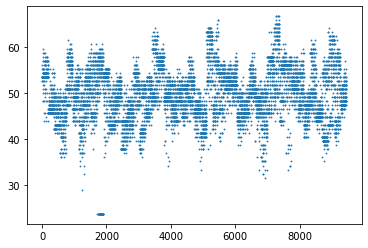

'\nSo you see that it differs quite strongly per season. The combinations of the features are always constant. It is 1890 in length because 6!/([1,2,3,4,5,6]-r)!)=1890. \n1890/10=189 so it is a new season for every 189 step in x value. \n'

In [45]:
indices=list(range(1, (len(list_accuracy_scores)+1)))
plt.scatter(indices,list_accuracy_scores,s=0.7,cmap='viridis')
plt.show()
"""
So you see that it differs quite strongly per season. The combinations of the features are always constant. It is 1890 in length because 6!/([1,2,3,4,5,6]-r)!)=1890. 
1890/10=189 so it is a new season for every 189 step in x value. 
"""

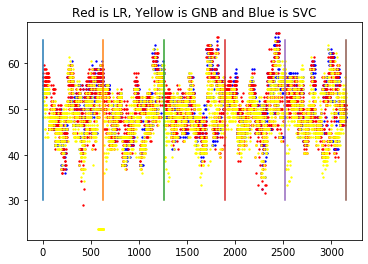

In [66]:
SVC_scores=[]
LR_scores=[]
GNB_scores=[]
#int(len(list_accuracy_scores)/2
for i in range(0,int(len(list_accuracy_scores))):
    if i%3==0:
        SVC_scores.append(list_accuracy_scores[i])
    if i%3==1:
        LR_scores.append(list_accuracy_scores[i])
    if i%3==2:
        GNB_scores.append(list_accuracy_scores[i])

specific_indices=list(range(0,3150))#int(len(list_accuracy_scores)/6), int(len(list_accuracy_scores)/3+1)))
plt.scatter(specific_indices, SVC_scores, s=1.8, c='b')
plt.scatter(specific_indices, LR_scores, s=1.8, c='r')
plt.scatter(specific_indices, GNB_scores, s=1.8, c='yellow')
for i in range(0, 3151):
    if i % 630 == 0:
        plt.plot([i,i],[30, 65])
plt.title("Red is LR, Yellow is GNB and Blue is SVC")
plt.show()


In [60]:
3150%630


0

In [9]:
wins=0
losses=0
draws=0
for j in range(len(datafiles)):
    dataset=pd.read_csv(datafiles[j])
    for i in range(len(y)):
        if y[i]=='H':
            wins+=1
        if y[i]=='A':
            losses+=1
        if y[i]=='D':
            draws+=1




In [10]:
print("Percentages of ",wins/(380*10)*100, losses/(380*10)*100, draws/(380*10)*100)
print(wins, draws, losses)

Percentages of  47.63157894736842 33.68421052631579 18.684210526315788
1810 710 1280
